# Introduction to Data Science – Homework 6
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, Feburary 28 2025, 11:59pm.

In Part 1 of this homework you will scrape github repositories and organize the information in a Pandas dataframe. In Part 2, you will use linear regression to gain meaningful insights. 

## Your Data
First Name: Scott
Last Name: Wardle
E-mail: Scott.L.Wardle@utah.edu
UID: u1484669

In [2]:
# imports and setup 
from bs4 import BeautifulSoup

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
# where the data is stored
DATA_PATH = "snapshots"

### 1. Scrape Github Repository List using BeautifulSoup
In this part you will explore Github repositories, specifically the 100 most-starred repositories. You are going to scrape data from a snapshot of [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms of service and policy documents of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) (see the tiny "terms" link at the bottom of the page) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your solution:**
Yes, I am allowed to scrape so long as I dont violate any of the API terms mentioned

Reference solution: The [terms of service](https://help.github.com/articles/github-terms-of-service/) do not mention scraping, but the [help pages on the site policy](https://help.github.com/en/github/site-policy/github-acceptable-use-policies#5-scraping-and-api-usage-restrictionsyou) allows scraping. You can scrape Github under the following conditions:

- Researchers may scrape public, non-personal information from GitHub for research purposes, only if any publications resulting from that research are open access.
- Archivists may scrape GitHub for public data for archival purposes.
- You may not scrape GitHub for spamming purposes, including for the purposes of selling GitHub users' personal information, such as to recruiters, headhunters, and job boards.

The [robots.txt](https://github.com/robots.txt) is a little less explicit about what is allowed and what not, but overall, since we are scraping Github pages for education/research purposes and not publishing the results, it is reasonable to assume that this is ok to do.

### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved a snapshot of the html files for you in the [snapshots](snapshots) folder. Note that the snapshots folder is not completely consistent with what you see on the web – we've made a few patches to the data that makes your task here easier and this data represents a snapshot in time. You will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder you will find first 10 pages of highly starred repositories saved as `search_page_1.html`,`search_page_2.html`,`search_page_3.html` ... `search_page_10.html`

Check out page 5 if you want to see what happens if you scrape too quickly 😉. **Tip**: you should skip page 5.

Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 

In [75]:
## Your code goes here
##define the location where I have the html files stored locally
file_path_pg1 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_1.html"
file_path_pg2 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_2.html"
file_path_pg3 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_3.html"
file_path_pg4 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_4.html"
file_path_pg6 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_6.html"
file_path_pg7 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_7.html"
file_path_pg8 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_8.html"
file_path_pg9 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_9.html"
file_path_pg10 = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/search_page_10.html"

#open and read files
file_paths = [file_path_pg1, file_path_pg2, file_path_pg3, file_path_pg4,
    file_path_pg6, file_path_pg7, file_path_pg8, file_path_pg9, file_path_pg10]

html_pages = {} #sstat a dictionary to store files

for i, file_path in enumerate(file_paths, start=1):
    with open(file_path, 'r', encoding='utf-8') as file:
        html_pages[f'html_pg{i}'] = file.read()

#html_pages
#take a look at one
html_pg1

{'html_pg1': '<!DOCTYPE html>\n<!-- saved from url=(0077)https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories&p=1 -->\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system" data-a11y-link-underlines="true" data-turbo-loaded=""><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><style type="text/css">.turbo-progress-bar {\n  position: fixed;\n  display: block;\n  top: 0;\n  left: 0;\n  height: 3px;\n  background: #0076ff;\n  z-index: 2147483647;\n  transition:\n    width 300ms ease-out,\n    opacity 150ms 150ms ease-in;\n  transform: translate3d(0, 0, 0);\n}\n</style>\n    \n  <link rel="dns-prefetch" href="https://github.githubassets.com/">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com/">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com/">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link re

In [74]:
#using those pages to create some soup
soup1 = BeautifulSoup(html_pg1, 'html.parser')
soup2 = BeautifulSoup(html_pg2, 'html.parser')
soup3 = BeautifulSoup(html_pg3, 'html.parser')
soup4 = BeautifulSoup(html_pg4, 'html.parser')
soup6 = BeautifulSoup(html_pg6, 'html.parser')
soup7 = BeautifulSoup(html_pg7, 'html.parser')
soup8 = BeautifulSoup(html_pg8, 'html.parser')
soup9 = BeautifulSoup(html_pg9, 'html.parser')
soup10 = BeautifulSoup(html_pg10, 'html.parser')

#lets take a look at it with prettify
print(soup1.prettify()[0:20000])

<!DOCTYPE html>
<!-- saved from url=(0077)https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories&p=1 -->
<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" data-turbo-loaded="" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <style type="text/css">
   .turbo-progress-bar {
  position: fixed;
  display: block;
  top: 0;
  left: 0;
  height: 3px;
  background: #0076ff;
  z-index: 2147483647;
  transition:
    width 300ms ease-out,
    opacity 150ms 150ms ease-in;
  transform: translate3d(0, 0, 0);
}
  </style>
  <link href="https://github.githubassets.com/" rel="dns-prefetch"/>
  <link href="https://avatars.githubusercontent.com/" rel="dns-prefetch"/>
  <link href="https://github-cloud.s3.amazonaws.com/" rel="dns-prefetch"/>
  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
  <link crossorigin="" href="ht

### Extracting Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

+ The name of the repository
+ The primary language (there are multiple or none, if multiple, use the first one, if none, use "none")
+ The number of watching
+ The number of stars
+ The number of forks
+ The number of issues
+ Number of commits
+ Number of pull requests, and

Here's an example for one repository, `freeCodeCamp/freeCodeCamp,` in our dataset: 
```python
{'name': 'freeCodeCamp',
'language': 'TypeScript',
'watching': '8500',
'stars': '410251',
'forks': '39007',
'issues': 168,
'commits': 37591,
'pull_requests':66
}
```
### Task 1.3 Extract repository URLs

If you look at the results of the 100 most-starred repositories [(this list)](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories), you will notice that all the information we want to extract for each repository is not in that list. This information is in the repository’s individual web page, for example [996icu](https://github.com/996icu/996.ICU). 

Therefore, you will first have to extract links of each repository from the soup you scraped earlier. When you extract the link for the repository, it will be a path to the stored HTML page for the repository. You will use this path to read the file and extract the above information.

Refer to the scraping lecture for details on how to do this. We recommend you use the web inspector to identify the relevant structures.

Example of a link that you need to extract - `996icu/996.ICU.html`. This means you need to access local folder `snapshots/996icu/996.ICU.html`. Similarly, for `521xueweihan/HelloGitHub.html` you should access `snapshots/521xueweihan/HelloGitHub.html` 

You may need to do string operations to get the desired format for the link. For example, if you get `link = https://github.com/996icu/996.ICU`, you can do
`link = (link+".html").replace("https://github.com/", "")` so you get `996icu/996.ICU.html`.

In [13]:
## Your code goes here
#define where my location is
mylocation = "C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots"
url_loc = [] #empty list to start

for page in soup1.find_all("a", class_="prc-Link-Link-85e08"): #identified the class with anchor tag to get the link
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup2.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup3.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup4.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup6.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup7.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup8.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup9.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

for page in soup10.find_all("a", class_="prc-Link-Link-85e08"):
    # get the link out of the href attribute
    link_tail = page.get("href")
    #remove the false positives
    if "search?" in link_tail or "topics" in link_tail or "stargazers" in link_tail or "search/advanced" in link_tail or "sponsors/explore" in link_tail:
        continue  #skip this iteration

    if link_tail:
        #remove https://github.com with mylocation if in the link_tail
        link_tail = (link_tail.replace("https://github.com",mylocation)+".html")
        url_loc.append(link_tail) #append it to the url_loc list

#make sure it looks rigtht
url_loc

['C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/freeCodeCamp/freeCodeCamp.html',
 'C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/EbookFoundation/free-programming-books.html',
 'C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/sindresorhus/awesome.html',
 'C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/codecrafters-io/build-your-own-x.html',
 'C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/public-apis/public-apis.html',
 'C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/jwasham/coding-interview-university.html',
 'C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/kamranahmedse/developer-roadmap.html',
 'C:/Users/scott/2025-datascience-homework/2025-datascience-homework/HW6/snapshots/donnemartin/system-design-primer.html',
 'C:/Users/scott/2025-datascience-ho

In [61]:

import os #import the os library to do some functions below
#create an empty list to store the repo data
repo_list = []

#Loop through each file in url_loc
for i, file_path in enumerate(url_loc, start=1):

    #check if file exists first - since there are plenty of missing ones
    if not os.path.exists(file_path):
        print(f"Warning: File not found - {file_path}")
        continue  #skip to the next file

    #read the file
    with open(file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    #create a beautiful delicious Soup object
    soup = BeautifulSoup(html_content, "html.parser")

    #get the erepository name
    repo_name = file_path.split("/")[-1].replace(".html", "")  # Last part of URL and without the .html part

    #get the language of the page
    language = soup.html.get("lang")

    #get the number of watchers
    watchers = soup.find("h3", string="Watchers") #locate the h3 with "Watchers" string
    if watchers:
        watchers_div = watchers.find_next("div") #Get the next div that contains the number
        if watchers_div:
            strong = watchers_div.find("strong") #find the <strong> sectiun inside it
            if strong:
                num_watchers = strong.get_text(strip=True)  #get the text
            else:
                num_watchers = None
        else:
            num_watchers = None
    else:
        num_watchers = None

    #get the number of stars
    stars = soup.find("h3", string="Stars")  #locate the h3 with "stars"
    if stars:
        stars_div = stars.find_next("div") #Get the next div that contains the number
        if stars_div:
            strong = stars_div.find("strong")  #find the <strong> sectiun inside it
            if strong:
                num_stars = strong.get_text(strip=True)  #gwt the stars
            else:
                num_stars = None
        else:
            num_stars = None
    else:
        num_stars = None

    #get the number of forks
    forksspan = soup.find("span",id="repo-network-counter")  #Get the span by its ID
    if forksspan:
        num_forks = forksspan.get_text(strip=True)  #extract and clean the text
    else:
        num_forks = None

    #get the number of commits
    commitspan = soup.find("span", class_="fgColor-default")
    if commitspan:
        num_commits = commitspan.get_text(strip=True).split()[0]  #extract only the number
    else:
        num_commits = None

    #get the number of issues
    issuesspan = soup.find("span",id="issues-repo-tab-count")  #Get the span by its ID
    if issuesspan:
        num_issues = issuesspan.get_text(strip=True)  #extract and clean the text
    else:
        num_issues = None

    #get the number of pulls
    pullsspan = soup.find("span", id="pull-requests-repo-tab-count")
    if pullsspan:
        num_pulls = pullsspan.get_text(strip=True).split()[0]  #extract only the number
    else:
        num_pulls = None

    # Append data to list
    repo_list.append({"File": file_path, "Repo Name": repo_name, "Language": language, "Watchers": num_watchers, "Stars": num_stars, 
                      "Forks": num_forks, "Issues": num_issues, "Commits": num_commits, "Pulls": num_pulls})

    repo_df = pd.DataFrame(repo_list)

#looking at several rows
print(repo_df.head(40))


                                                 File  \
0   C:/Users/scott/2025-datascience-homework/2025-...   
1   C:/Users/scott/2025-datascience-homework/2025-...   
2   C:/Users/scott/2025-datascience-homework/2025-...   
3   C:/Users/scott/2025-datascience-homework/2025-...   
4   C:/Users/scott/2025-datascience-homework/2025-...   
5   C:/Users/scott/2025-datascience-homework/2025-...   
6   C:/Users/scott/2025-datascience-homework/2025-...   
7   C:/Users/scott/2025-datascience-homework/2025-...   
8   C:/Users/scott/2025-datascience-homework/2025-...   
9   C:/Users/scott/2025-datascience-homework/2025-...   
10  C:/Users/scott/2025-datascience-homework/2025-...   
11  C:/Users/scott/2025-datascience-homework/2025-...   
12  C:/Users/scott/2025-datascience-homework/2025-...   
13  C:/Users/scott/2025-datascience-homework/2025-...   
14  C:/Users/scott/2025-datascience-homework/2025-...   
15  C:/Users/scott/2025-datascience-homework/2025-...   
16  C:/Users/scott/2025-datasci

### Task 1.4 Extracting required information

Once you have extracted links for each repository, you can start parsing those HTML pages using BeautifulSoup and extract all the required information.

**Note**: There are few repositories which do not contain 'issues' field (such as 996icu/996.ICU.html). Therefore, write your code such that it handles this condition as well.

**Save the dataframe you created to a new file project_info.csv and include this in your submission.** This separate file will also be graded and is required to earn points.

You also need to make sure that you reformat all numerical columns to be integer data. You can do that either as you parse, or when you have a dataframe with strings.

Some repositories (~30) are missing in the collection, we have provided code to skip these cases, and similarly in the next frame to NOT inlclude the None numbers in the storage.

**Tips**: the exact value of stars and forks can be found on top right corner, with mouse hover over the value. E.g., hover over 410k, shows 410,246. For *watching*, the data is abbreviated, You need to manually convert it. For example, 8.5k should be converted to 8500.

In [6]:
'''
from pathlib import Path

def extract_repository_details(url):
    row = []
    
    file_path = Path("snapshots") / url
    if file_path.exists():
        with file_path.open('r', encoding="utf8") as f:
            file = f.read()
            
    ## Your code goes here
    
    data = {"name": repo_name,
            "language":language,
            "watching": watching, 
            "stars": stars, 
            "forks": forks, 
            "issues":issues,
            "commits": commits,
            "pull_requests": pull_requests
    }
        
    return(data)
'''
### Did this part above in Task 1.3 instead

In [62]:
'''
## complete extract_repository_details() before running this snippet
repo_info_list = []
for repo in repo_list:
    item = extract_repository_details(repo)
    if item is not None:  
        repo_info_list.append(item)
'''
###Did the part above in Task 1.3 instead

##use a lmbda function to convert the variables to integers, remove the k's and decimals - 
repo_df["Watchers"] = (repo_df["Watchers"].apply(lambda x: float(x.replace('k', '')) * 1000 if 'k' in str(x)
                                                 else float(x)).astype(int))
repo_df["Stars"] = (repo_df["Stars"].apply(lambda x: float(x.replace('k', '')) * 1000 if 'k' in str(x)
                                                 else float(x)).astype(int))
repo_df["Forks"] = (repo_df["Forks"].apply(lambda x: float(x.replace('k', '')) * 1000 if 'k' in str(x)
                                                 else float(x)).astype(int))
repo_df["Issues"] =(repo_df["Issues"].apply(lambda x: 0 if x is None or x == "None" else float(x.replace('k+', '').replace('k', ''))
                                            * 1000 if 'k' in str(x) else float(x)).astype(int))
repo_df["Pulls"] = (repo_df["Pulls"].apply(lambda x: float(x.replace('k', '')) * 1000 if 'k' in str(x)
                                                 else float(x)).astype(int))
repo_df["Commits"] = (repo_df["Commits"].apply(lambda x: float(x.replace(',', '')) * 1 if ',' in str(x)
                                                 else float(x)).astype(int))
print(repo_df.head(40))
project_info = repo_df
#project_info = pd.DataFrame(repo_info_list)
project_info.to_csv('project_info.csv', index=False)

                                                 File  \
0   C:/Users/scott/2025-datascience-homework/2025-...   
1   C:/Users/scott/2025-datascience-homework/2025-...   
2   C:/Users/scott/2025-datascience-homework/2025-...   
3   C:/Users/scott/2025-datascience-homework/2025-...   
4   C:/Users/scott/2025-datascience-homework/2025-...   
5   C:/Users/scott/2025-datascience-homework/2025-...   
6   C:/Users/scott/2025-datascience-homework/2025-...   
7   C:/Users/scott/2025-datascience-homework/2025-...   
8   C:/Users/scott/2025-datascience-homework/2025-...   
9   C:/Users/scott/2025-datascience-homework/2025-...   
10  C:/Users/scott/2025-datascience-homework/2025-...   
11  C:/Users/scott/2025-datascience-homework/2025-...   
12  C:/Users/scott/2025-datascience-homework/2025-...   
13  C:/Users/scott/2025-datascience-homework/2025-...   
14  C:/Users/scott/2025-datascience-homework/2025-...   
15  C:/Users/scott/2025-datascience-homework/2025-...   
16  C:/Users/scott/2025-datasci

### 2. Analyzing the repository data

In this part, you will analyze the data collected in Part 1 using regression tools. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. **We need you to do this so that we can run your code below without having to run your scraping code, which can be slow.**

In [63]:
project_info = pd.read_csv('project_info.csv')
project_info.head()

,File,Repo Name,Language,Watchers,Stars,Forks,Issues,Commits,Pulls
0,C:/Users/scott/2025-datascience-homework/2025-...,freeCodeCamp,en,8500,410000,39000,168,37591,66
1,C:/Users/scott/2025-datascience-homework/2025-...,free-programming-books,en,9800,351000,62900,29,9499,55
2,C:/Users/scott/2025-datascience-homework/2025-...,awesome,en,7800,348000,28600,12,1154,40
3,C:/Users/scott/2025-datascience-homework/2025-...,build-your-own-x,en,5600,338000,31200,190,571,162
4,C:/Users/scott/2025-datascience-homework/2025-...,public-apis,en,1300,94800,32500,1700,26364,161


### Task 2.1 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

In [64]:
# your code goes here
#see what the data looks like with describe
project_info.describe()

,Watchers,Stars,Forks,Issues,Commits,Pulls
count,48.000000,48.000000,48.000000,48.000000,4.800000e+01,48.000000
mean,3345.895833,159016.666667,27143.750000,812.229167,4.155038e+04,239.958333
std,2634.324761,90474.976753,18060.193753,1236.583510,1.917329e+05,488.928484
min,242.000000,80700.000000,4400.000000,0.000000,2.040000e+02,0.000000
25%,1218.750000,90950.000000,10375.000000,41.000000,1.106500e+03,33.250000
50%,2700.000000,118000.000000,24300.000000,158.000000,4.201000e+03,115.000000
75%,5650.000000,202000.000000,37350.000000,1425.000000,2.636400e+04,294.250000
max,9800.000000,410000.000000,78000.000000,5000.000000,1.336263e+06,3300.000000


In [65]:
#keeping just hte numeric vars and running a correlation on them
project_info_num = project_info.select_dtypes(include=['number'])
corr_matrix = project_info_num.corr()

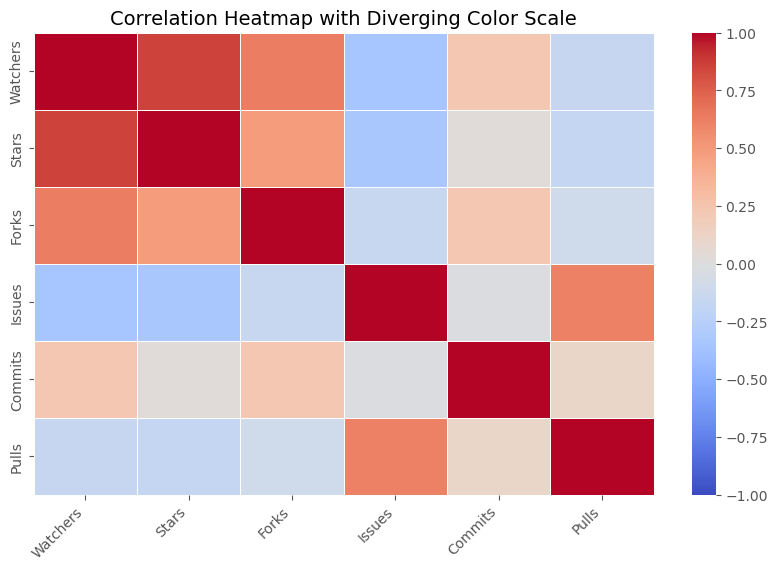

In [66]:
#Do a heatmap on the correlation
import seaborn as sns #import seaborn - use coolwarm as it make it look nicer
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)

plt.xticks(rotation=45, ha='right', fontsize=10) #Rotate x labels more readability

#puy in a title
plt.title("Correlation Heatmap with Diverging Color Scale", fontsize=14)
plt.show()

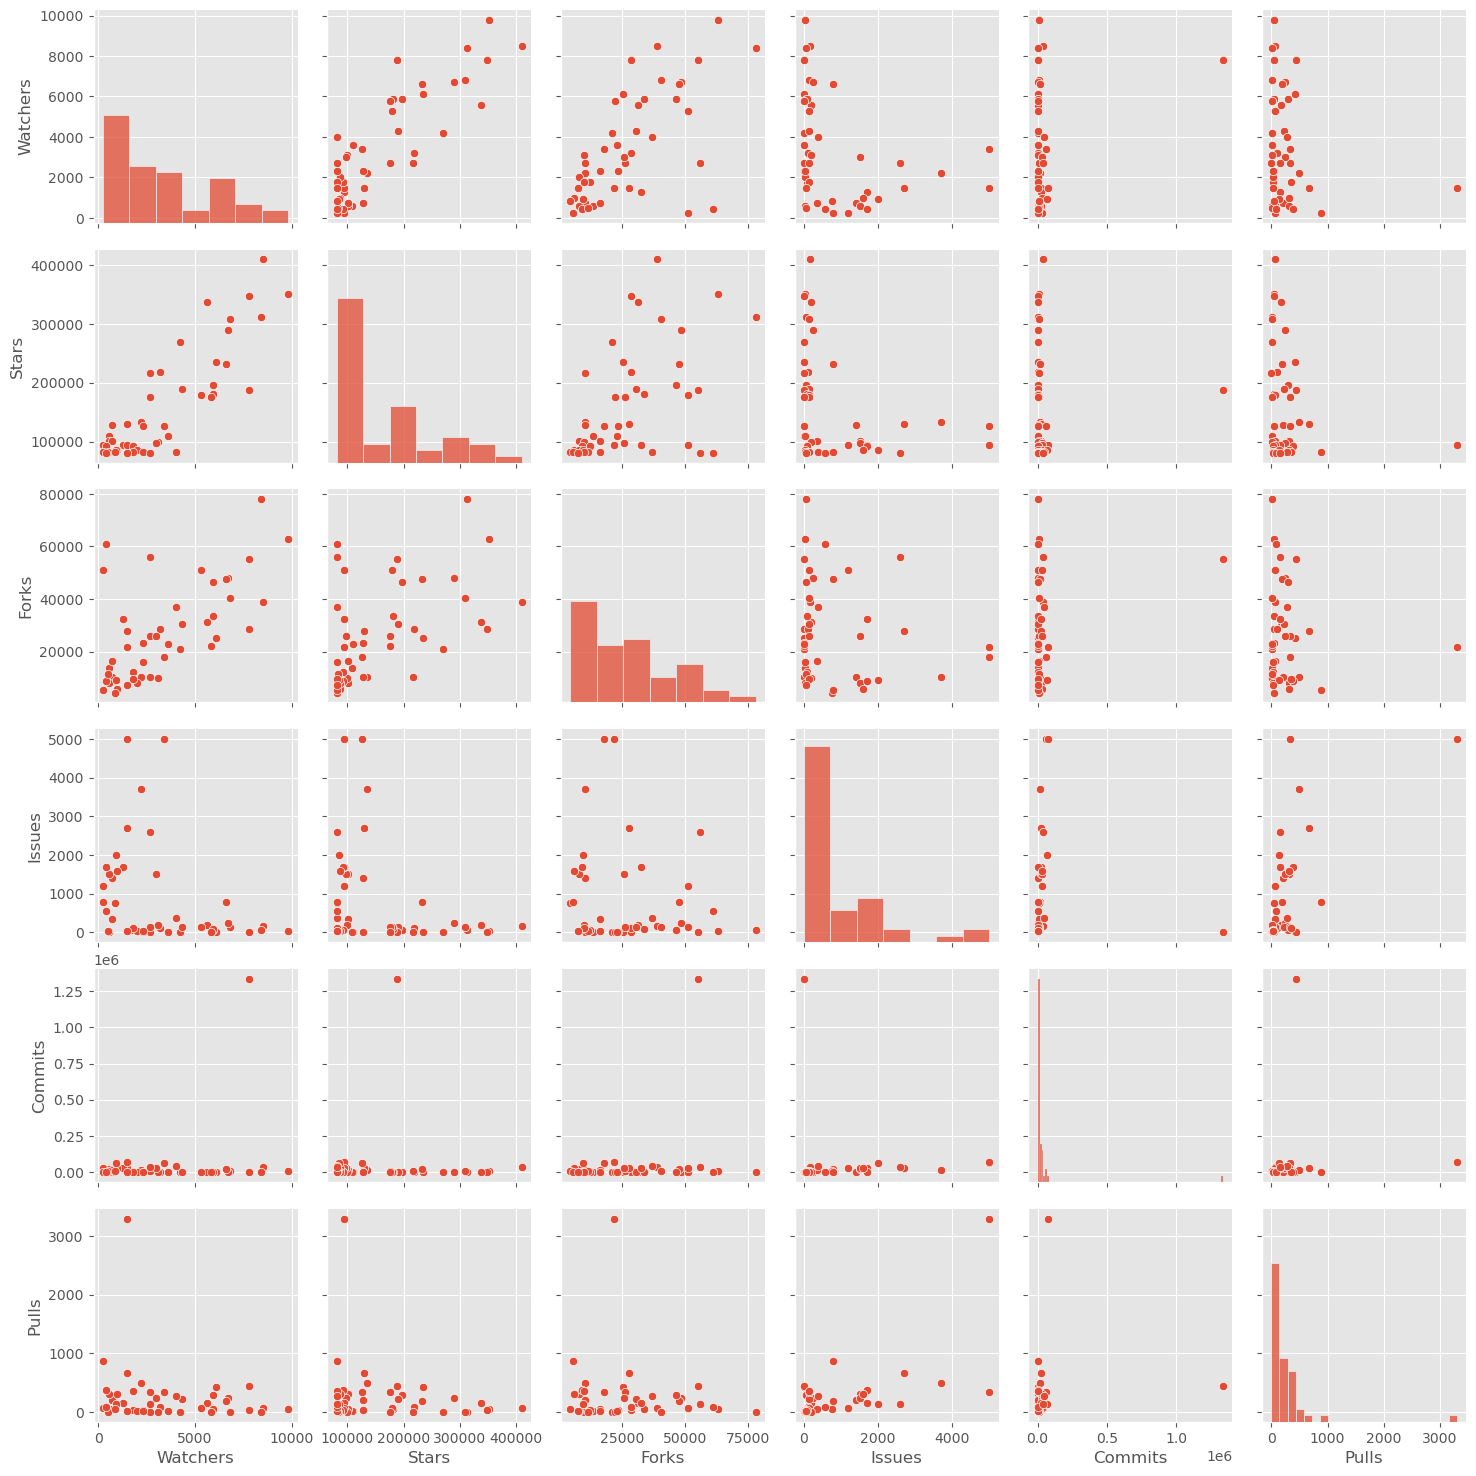

In [68]:
#create a scatterplot using pairplot from seaborb for all numeric columns in repo_df
sns.pairplot(repo_df)
#Show it
plt.show()

**Your Interpretation:** TODO
The elements on the pages first off seem to all be skewed with right tailed.  there is some strong positive correlation between watcher, stars and forks and negative correlation wtih Issues. Pulls and commits dont seem to have strong correlations wtih anything

### 2.2. Linear regression

1. Use linear regression to try to predict the number of Stars based on Forks, Pull Requests, and Commits. Discuss the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Develop another model which is better. Explain why it is better and interpret your results. Hint: try using other variables such as watching and/or Contributors. 

In [69]:
# your code goes here
#run an ordinary least squares regression on the 3 vars and fit the model
stars_by_3 = sm.ols(formula="Stars ~ Forks + Pulls + Commits ", data=project_info_num).fit()
#produce the summary stats on the OLS
stars_by_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Stars   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     5.176
Date:                Thu, 27 Feb 2025   Prob (F-statistic):            0.00377
Time:                        19:13:00   Log-Likelihood:                -608.17
No. Observations:                  48   AIC:                             1224.
Df Residuals:                      44   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.769e+04   2.25e+04      4.338      0.000    5.23e+04    1.43e+05
Forks          2.4944      0.672      3.712      0.001       1.140       3.849
Pulls        -20.4127     24.312     -0.840      0.406     -69.410      28.584
Commits       -0.0357      0.063     -0.563      0.576      -0.163       0.092
==============================================================================
Omnibus:                        5.617   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.460
Skew:                           0.615   Prob(JB):                        0.108
Kurtosis:                       3.848   Cond. No.                     3.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#same thing on other vars
stars_by_others = sm.ols(formula="Stars ~ Forks + Watchers + Issues ", data=project_info_num).fit()
stars_by_others.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Stars   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.87
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           5.99e-13
Time:                        19:15:38   Log-Likelihood:                -583.04
No. Observations:                  48   AIC:                             1174.
Df Residuals:                      44   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.94e+04   1.49e+04      4.655      0.000    3.94e+04    9.94e+04
Forks         -0.3796      0.497     -0.763      0.449      -1.382       0.623
Watchers      30.5933      3.598      8.503      0.000      23.342      37.845
Issues        -3.0052      6.024     -0.499      0.620     -15.145       9.135
==============================================================================
Omnibus:                        0.151   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.163
Skew:                           0.115   Prob(JB):                        0.922
Kurtosis:                       2.831   Cond. No.                     7.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#issues var sucked, removing it
stars_by_others2 = sm.ols(formula="Stars ~ Forks + Watchers", data=project_info_num).fit()
stars_by_others2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Stars   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     63.74
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           7.42e-14
Time:                        19:20:28   Log-Likelihood:                -583.17
No. Observations:                  48   AIC:                             1172.
Df Residuals:                      45   BIC:                             1178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.561e+04   1.27e+04      5.156      0.000       4e+04    9.12e+04
Forks         -0.4034      0.491     -0.822      0.416      -1.392       0.585
Watchers      31.1891      3.366      9.267      0.000      24.411      37.968
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.274
Skew:                           0.157   Prob(JB):                        0.872
Kurtosis:                       2.804   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#fork var sucks too, removing it -- interesting it was useful in the other model, but not with watchers var present
stars_by_watchers = sm.ols(formula="Stars ~ Watchers", data=project_info_num).fit()
stars_by_watchers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Stars   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           7.24e-15
Time:                        19:22:01   Log-Likelihood:                -583.53
No. Observations:                  48   AIC:                             1171.
Df Residuals:                      46   BIC:                             1175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.049e+04   1.11e+04      5.473      0.000    3.82e+04    8.27e+04
Watchers      29.4481      2.606     11.301      0.000      24.203      34.693
==============================================================================
Omnibus:                        0.669   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.372
Skew:                           0.215   Prob(JB):                        0.830
Kurtosis:                       3.019   Cond. No.                     6.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation:** TODO
For the first model with Forks, Pulls and Commits the R-square is 0.261.  This tells us that 26% of the variation in number Stars can be explained by these variables.  Not too great.  The F-Statistic is 5.176 and P-value of F-statistic is 0.00377.  This show it has significance, better than random. But nothing to write home about.  To examine what is contributing (or not) to the model, the Forks p-value is 0.001 - so that is showing it certainly belongs in the model.  But the Pulls p-value is 0.406 and Commits p-value is 0.576.  Clearly those attributes are not helpful as the critical value of being lower than 0.05 is not met for these.  Best to drop them.
For a better model, I tried using Watchers, Forks and Issues.  Examining the p-values of those elements, it was clear that Issues and Forks are not helping, at least in the presence of the Watchers variable which by itself explains 0.735 (the R-Square) of the variation in Stars.  When looking at the F-Statistic is 127.7 and P-value of F-statistic is 7.24e-15.  So it is very significant.  And the P-value of the Watchers coefficient is 0.000.  All of this shows that Watchers is the best predictor of Stars.  